In [1093]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1094]:
sp500 = pd.read_csv("AAPL.csv", index_col=0)
#sp500 = pd.read_csv("MSFT.csv", index_col=0)
#sp500 = pd.read_csv("GOOGL.csv", index_col=0)
#sp500 = pd.read_csv("META.csv", index_col=0)
#sp500 = pd.read_csv("JPM.csv", index_col=0)


In [1095]:
sp500.index = pd.to_datetime(sp500.index)

In [1096]:
sp500

,Company,Open,High,Low,Close,Volume,Sector,EMA_50,EMA_200,RSI,MACD,MACD_Signal,MACD_Hist,Season
Date,,,,,,,,,,,,,,
1980-12-12,AAPL,0.099058,0.099488,0.099058,0.099058,469033600.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter
1980-12-15,AAPL,0.094320,0.094320,0.093890,0.093890,175884800.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter
1980-12-16,AAPL,0.087429,0.087429,0.086999,0.086999,105728000.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter
1980-12-17,AAPL,0.089152,0.089582,0.089152,0.089152,86441600.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter
1980-12-18,AAPL,0.091737,0.092167,0.091737,0.091737,73449600.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980-12-05,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,191.214963,181.944088,65.265105,7.877255,7.877255,0.0,Winter
1980-12-08,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,191.214963,181.944088,65.265105,7.877255,7.877255,0.0,Winter
1980-12-09,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,191.214963,181.944088,65.265105,7.877255,7.877255,0.0,Winter


<Axes: xlabel='Date'>

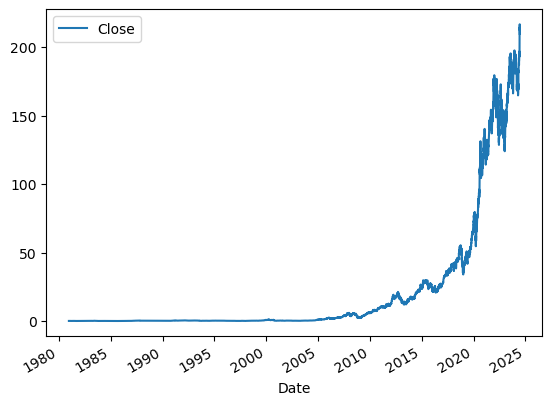

In [1097]:
sp500.plot.line(y="Close", use_index=True)

In [1098]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
season = ('Winter','Spring','Summer','Fall')
season_df = pd.DataFrame(season, columns=['season_types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
sp500['season_type_cat'] = labelencoder.fit_transform(sp500['Season'])
sp500.head()

,Company,Open,High,Low,Close,Volume,Sector,EMA_50,EMA_200,RSI,MACD,MACD_Signal,MACD_Hist,Season,season_type_cat
Date,,,,,,,,,,,,,,,
1980-12-12,AAPL,0.099058,0.099488,0.099058,0.099058,469033600.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter,3
1980-12-15,AAPL,0.094320,0.094320,0.093890,0.093890,175884800.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter,3
1980-12-16,AAPL,0.087429,0.087429,0.086999,0.086999,105728000.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter,3
1980-12-17,AAPL,0.089152,0.089582,0.089152,0.089152,86441600.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter,3
1980-12-18,AAPL,0.091737,0.092167,0.091737,0.091737,73449600.0,Technology,NaN,NaN,NaN,NaN,NaN,NaN,Winter,3


In [1099]:
#features = ["Open",	"High",	"Low",	"Close", "Volume", "EMA_50", "EMA_200",	"RSI",	"MACD",	"MACD_Signal",	"MACD_Hist"]
#features = ["Open",	"High",	"Low",	"Close", "Volume","season_type_cat"]
#features = ["Open",	"High",	"Low",	"Close", "Volume", "EMA_50", "EMA_200"]
features = ["EMA_50", "EMA_200",	"RSI",	"MACD",	"MACD_Signal",	"MACD_Hist"]
#features = ["EMA_50", "EMA_200",	"RSI",	"MACD_Signal"]

del sp500["Company"]
del sp500["Sector"]
#del sp500["EMA_50"]
#del sp500["EMA_200"]
#del sp500["RSI"]
#del sp500["MACD"]
#del sp500["MACD_Signal"]
#del sp500["MACD_Hist"]
del sp500["Season"]
del sp500["season_type_cat"]
del sp500["Open"]
del sp500["High"]
del sp500["Low"]
del sp500["Volume"]





In [1100]:
# drop all the null values from the dataset
sp500.dropna(inplace=True)

In [1101]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [1102]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [1103]:
sp500 = sp500.loc["1990-01-01":].copy()

In [1104]:
sp500

,Close,EMA_50,EMA_200,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow,Target
Date,,,,,,,,,
1990-01-02,0.262722,0.286544,0.296677,44.015962,-0.014577,-0.016081,0.001504,0.264485,1
1990-01-03,0.264485,0.285679,0.296357,45.266587,-0.012858,-0.015436,0.002578,0.265367,1
1990-01-04,0.265367,0.284882,0.296048,45.917979,-0.011293,-0.014607,0.003314,0.266249,1
1990-01-05,0.266249,0.284152,0.295752,46.601377,-0.009869,-0.013660,0.003791,0.268012,1
1990-01-08,0.268012,0.283519,0.295476,48.016345,-0.008500,-0.012628,0.004128,0.265367,0
...,...,...,...,...,...,...,...,...,...
2024-06-13,214.240005,187.395134,180.665689,79.582106,6.915170,5.204766,1.710404,212.490005,0
2024-06-14,212.490005,188.379246,180.982349,75.881718,7.375922,5.638997,1.736925,216.669998,1
2024-06-17,216.669998,189.488688,181.337450,78.458247,7.986301,6.108458,1.877843,214.289993,0


In [1105]:
# drop all the null values from the dataset
sp500.dropna(inplace=True)

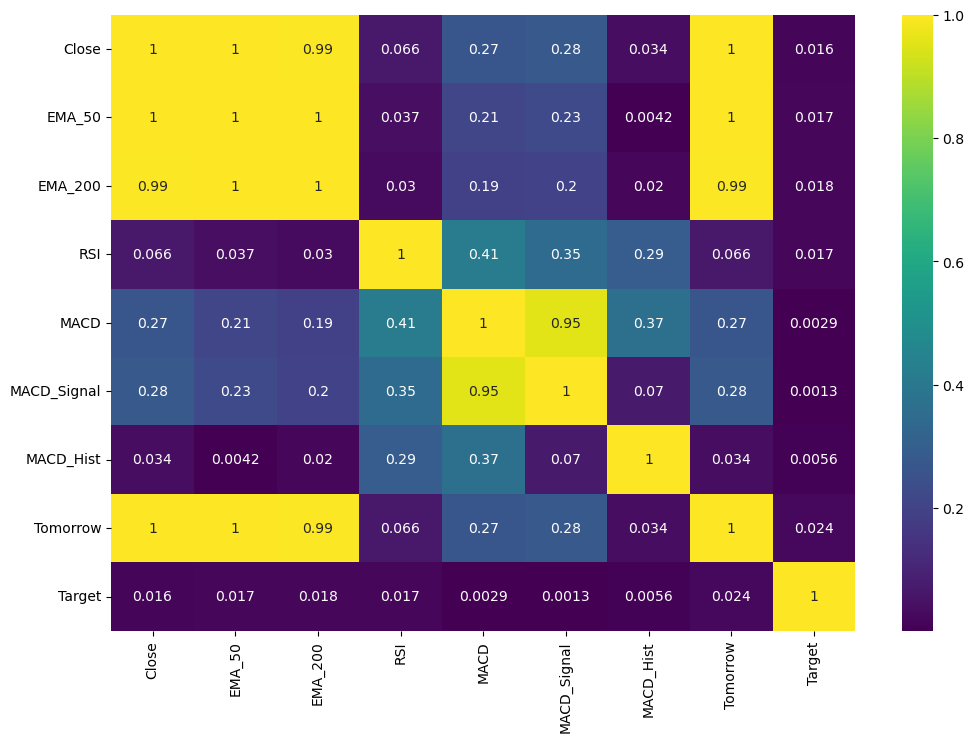

In [1106]:
# Create a heatmap
# Load the data from the uploaded CSV file

# Select the numerical columns of interest
#numerical_columns = [features]

# Drop rows with NaN values in these columns
#data_cleaned = sp500[features].dropna()
data_cleaned = sp500.dropna()

# Create a heatmap of the cleaned data
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='viridis')

# Display the heatmap
plt.show()


In [1107]:
#copy df from later use of xg_boost model (prediction of close value)
sp500_xg = sp500

In [1108]:
#import required libraries
from sklearn.ensemble import RandomForestClassifier

#create object model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#assign all rows except the last 100 to train

train = sp500.iloc[:-730]

#assign the last rows to test
test = sp500.iloc[-730:]

#input features, observations
predictors = features

#train the model
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [1109]:
#prediction
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5397260273972603

<Axes: xlabel='Date'>

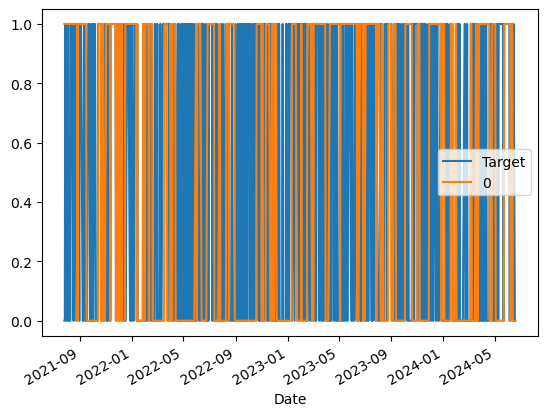

In [1110]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [1111]:
from sklearn.metrics import classification_report

print(classification_report(test["Target"], preds))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       352
           1       0.54      0.52      0.53       378

    accuracy                           0.52       730
   macro avg       0.52      0.52      0.52       730
weighted avg       0.52      0.52      0.52       730



Confusion Matrix:
[[184 168]
 [181 197]]


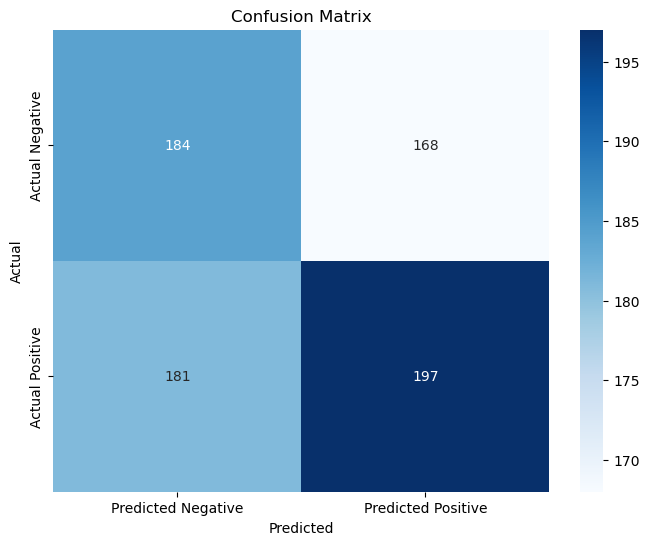

In [1112]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate confusion matrix
conf_matrix = confusion_matrix(test["Target"], preds)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [1113]:
#!pip install lime


In [1114]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['0', '1']

# Get the feature names
feature_names = list(predictors)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(training_data=np.array(test[predictors]), feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

In [1115]:
# Assuming model is your trained Random Forest classifier and X_test is your test set
i = 365  # Index of the instance you want to explain 
exp = explainer.explain_instance(test[predictors].values[i], model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1116]:
test[predictors].values[365]

array([138.3321663 , 146.8263203 ,  33.47837666,  -4.8668905 ,
        -4.16027203,  -0.70661847])

In [1117]:
preds[365]

0

In [1118]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(test)

Variable Importance Plot - Global Interpretation


C:\Users\samue\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\samue\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


<Figure size 640x480 with 0 Axes>

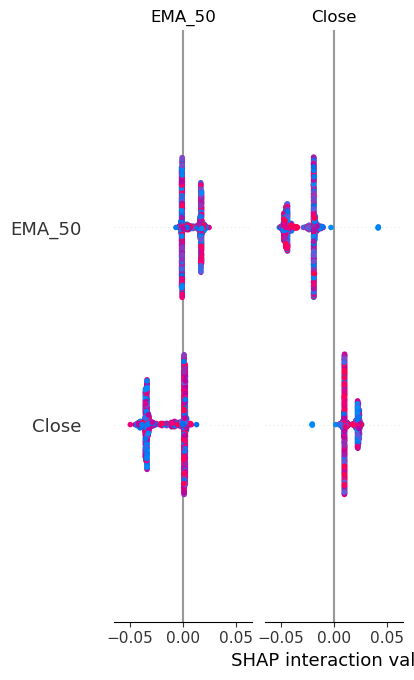

In [1119]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, test)

Shape of test: (730, 9)
Shape of shap_values: (730, 9, 2)


C:\Users\samue\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\samue\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


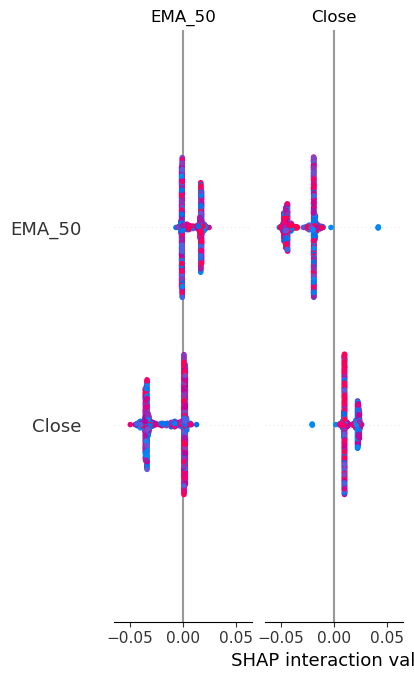

In [1120]:
# Print shapes to diagnose the issue
print("Shape of test:", test.shape)
print("Shape of shap_values:", np.array(shap_values).shape)

# For binary classification, use shap_values[1] for the positive class
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values

# Plot SHAP summary
shap.summary_plot(shap_values_to_plot, test)

In [1121]:
sp500_xg.head()

,Close,EMA_50,EMA_200,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow,Target
Date,,,,,,,,,
1990-01-02,0.262722,0.286544,0.296677,44.015962,-0.014577,-0.016081,0.001504,0.264485,1
1990-01-03,0.264485,0.285679,0.296357,45.266587,-0.012858,-0.015436,0.002578,0.265367,1
1990-01-04,0.265367,0.284882,0.296048,45.917979,-0.011293,-0.014607,0.003314,0.266249,1
1990-01-05,0.266249,0.284152,0.295752,46.601377,-0.009869,-0.013660,0.003791,0.268012,1
1990-01-08,0.268012,0.283519,0.295476,48.016345,-0.008500,-0.012628,0.004128,0.265367,0


In [1122]:
X = sp500_xg.drop('Close', axis=1)
y = sp500_xg['Close']


In [1123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1124]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#learning_rate=0.1(default)
model2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=3)
model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1125]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.9829718455624717


In [1126]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.991449
